In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_boston()

In [3]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data_arr = dataset.data
boston_data_df = pd.DataFrame(boston_data_arr, columns=dataset.feature_names)
boston_data_df['target'] = dataset.target

In [5]:
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


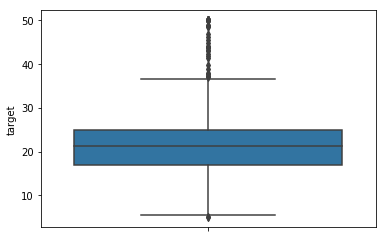

In [6]:
sns.boxplot(y=boston_data_df['target'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


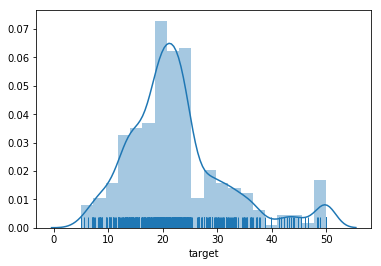

In [7]:
sns.distplot(boston_data_df.target,bins=20, rug=True)

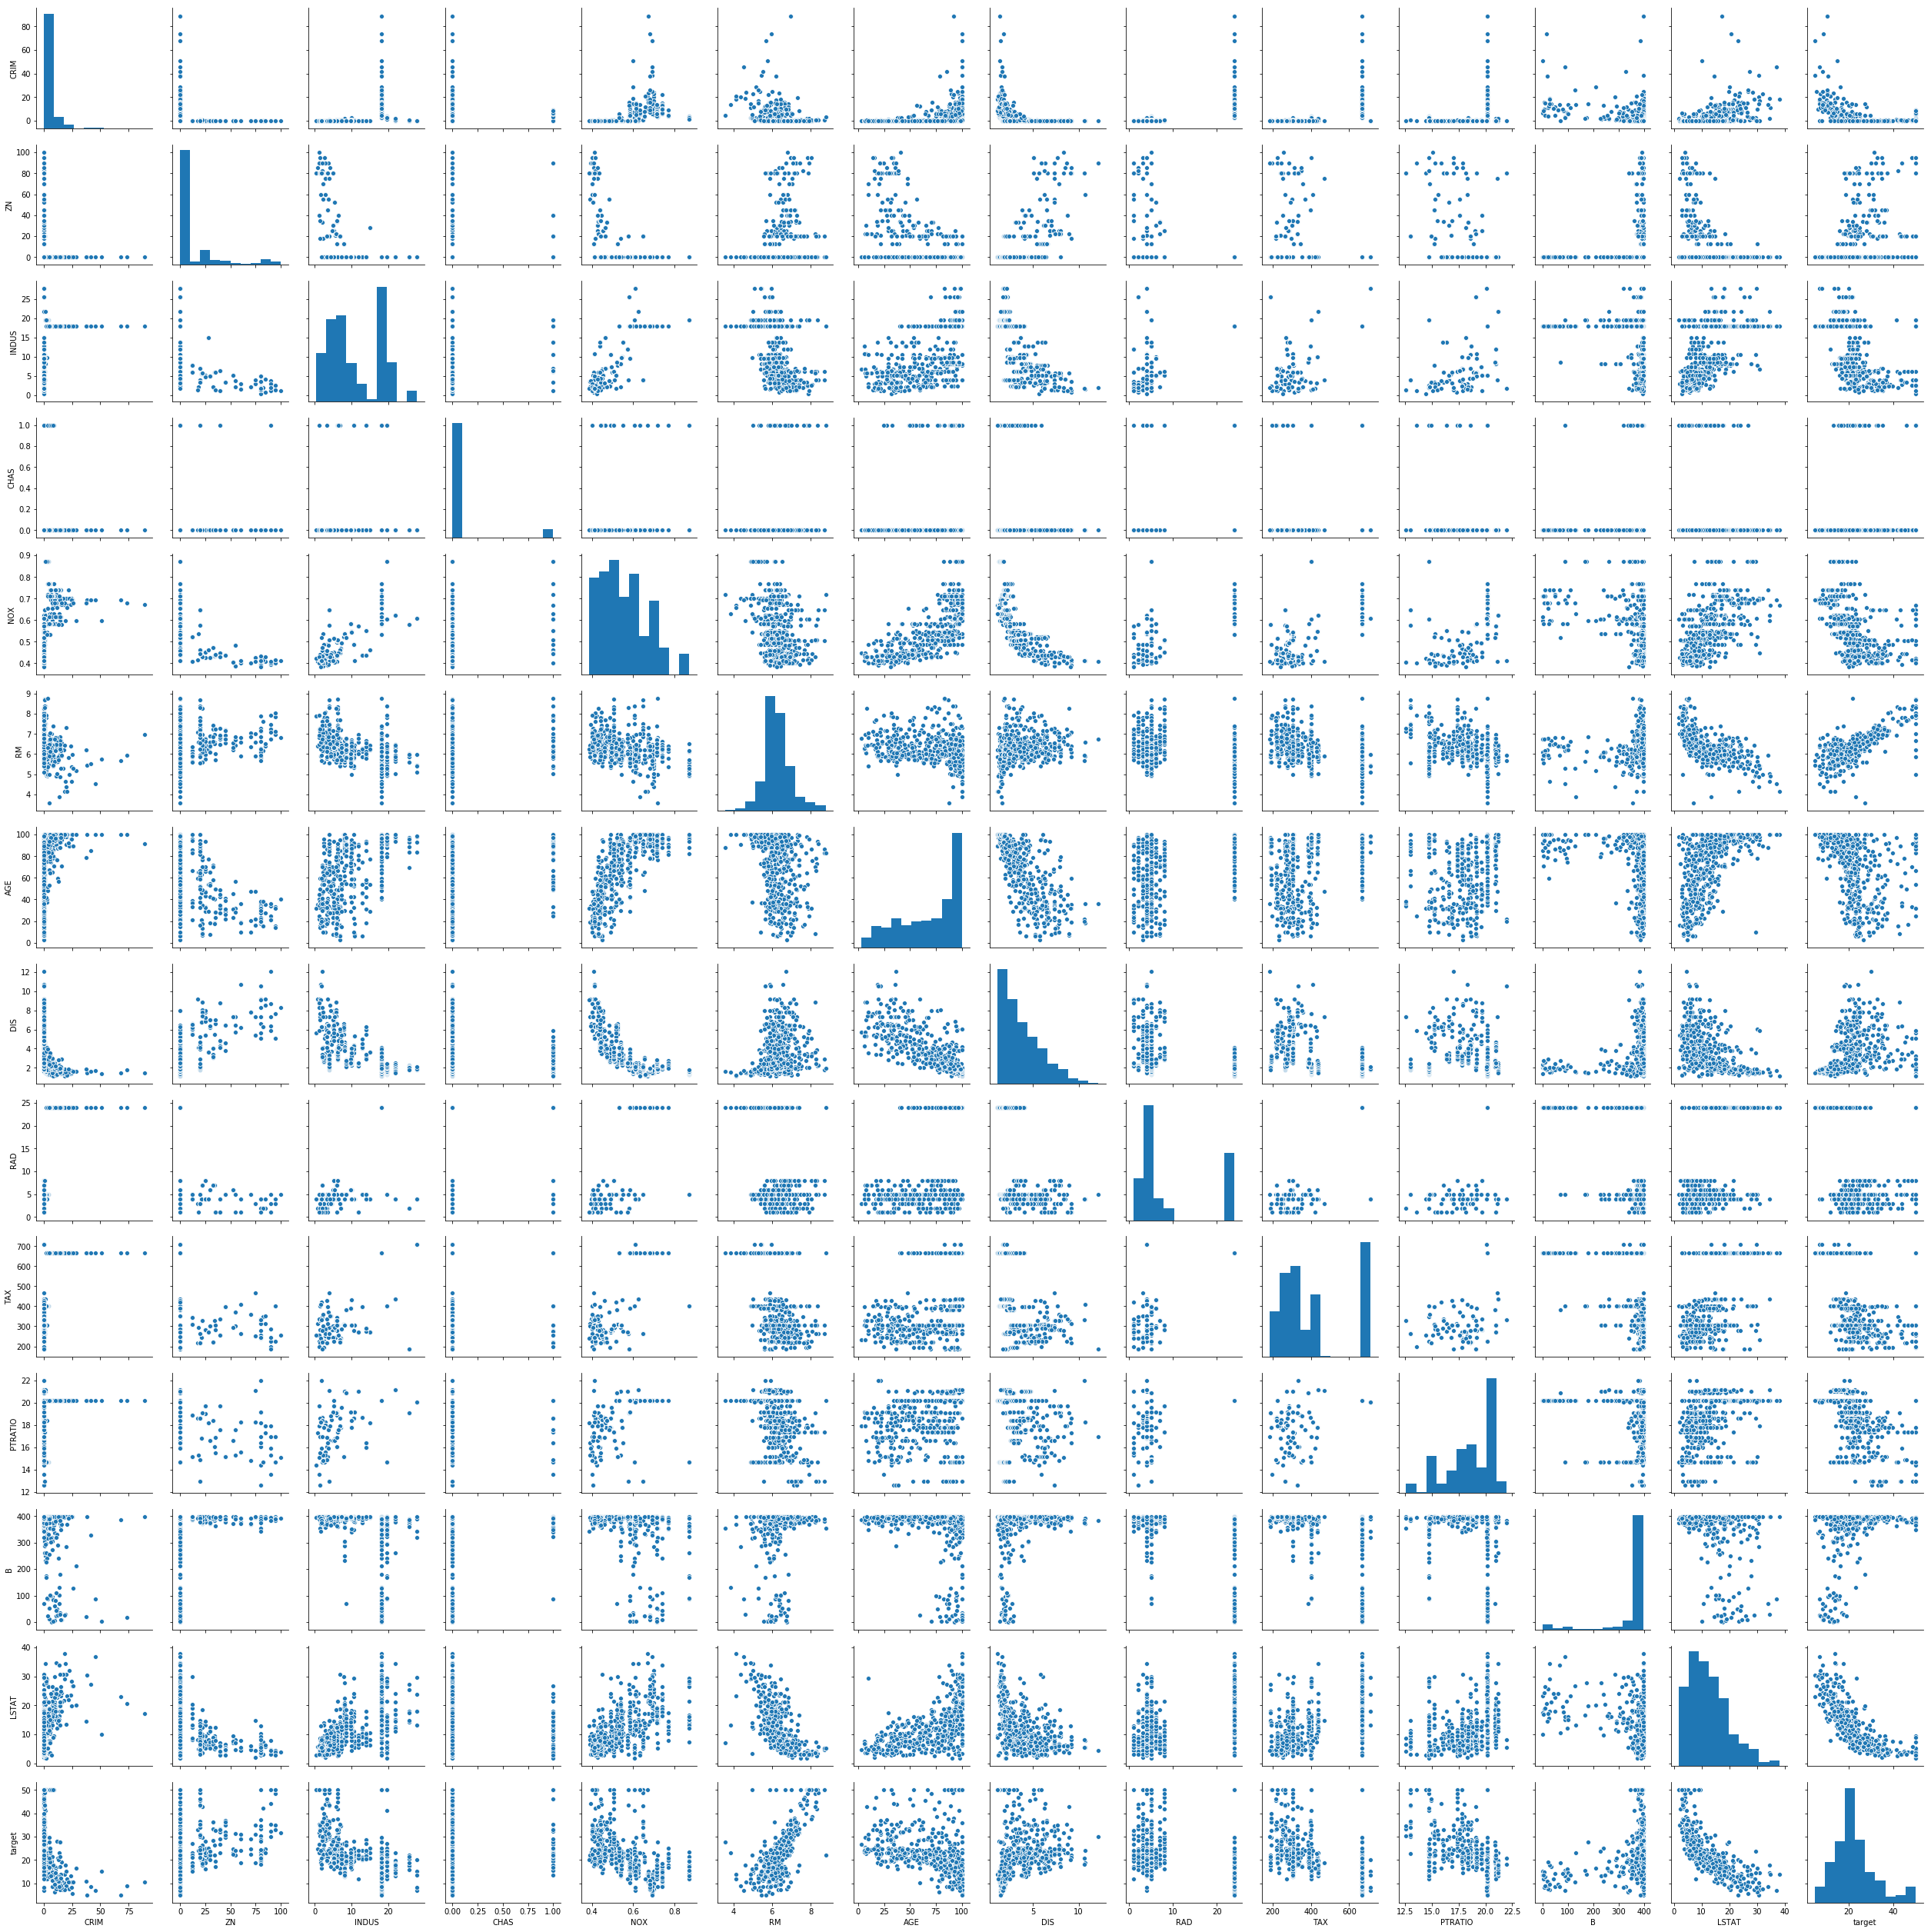

In [8]:
sns.pairplot(boston_data_df)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e93f4b4a8>,
      dtype=object)

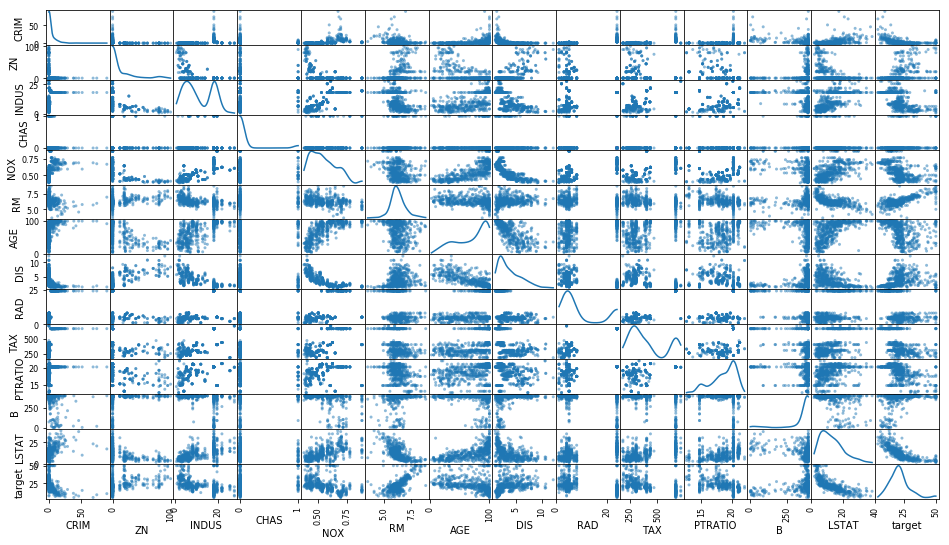

In [9]:
# pd.scatter_matrix(boston_data_df, diagonal='kde', # default=hist,
#                  figsize=(16,9),
#                  range_padding=0.1)

In [10]:
boston_data_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


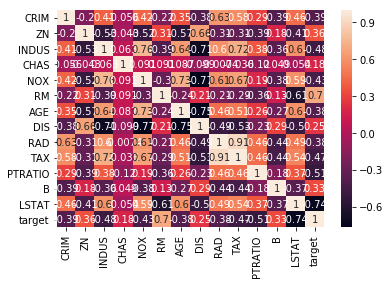

In [11]:
sns.heatmap(boston_data_df.corr(), annot=True)

# 1. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [13]:
X = boston_data_df[dataset.feature_names].values
y = boston_data_df['target'].values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/5,random_state=10)

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
score = lr_model.score(X_test, y_test)
print(score)

0.6709339839115631


In [16]:
y_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
lr_rmse

5.86634199933302

Text(0.5,1,'RMSE: 5.86634199933302')

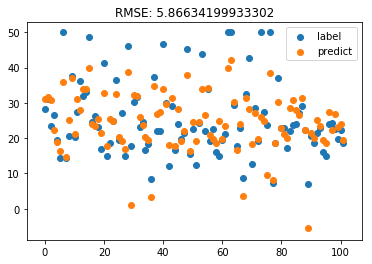

In [17]:
plt.scatter(range(len(y_test)),y_test, label='label')
plt.scatter(range(len(y_pred)),y_pred, label='predict')
plt.legend()
plt.title('RMSE: %s'%(lr_rmse))

Text(0.5,1,'no minmaxscale')

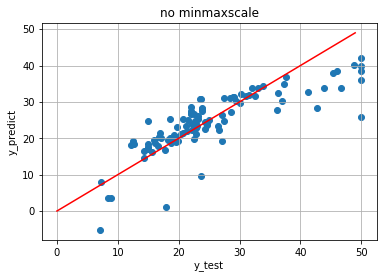

In [18]:
plt.scatter(y_test, y_pred)
plt.plot(range(50),range(50), c='r')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.grid()
plt.title('no minmaxscale')

minmax_scale

In [19]:
lr_model1 = LinearRegression()
lr_model1.fit(minmax_scale(X_train), y_train)
score1 = lr_model1.score(minmax_scale(X_test), y_test)
print('score: ',score1)
y_pred1 = lr_model1.predict(minmax_scale(X_test))
lr_rmse1 = np.sqrt(mean_squared_error(y_pred1, y_test))
lr_rmse1

score:  0.45871465275542495


7.523830392885134

Text(0.5,1,'minmaxscale')

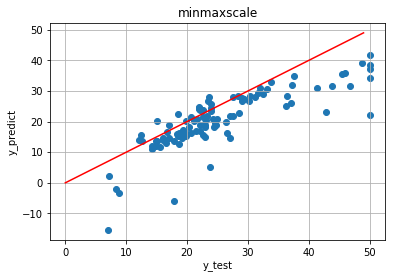

In [20]:
plt.scatter(y_test, y_pred1)
plt.plot(range(50),range(50), c='r')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.grid()
plt.title('minmaxscale')

 # 2. adaboost

In [21]:
abr_model = AdaBoostRegressor(n_estimators=200, learning_rate=0.1)
abr_model.fit(X_train, y_train)
y_pred_abr = abr_model.predict(X_test)

Text(0.5,1,'RMSE: 4.114479894051587')

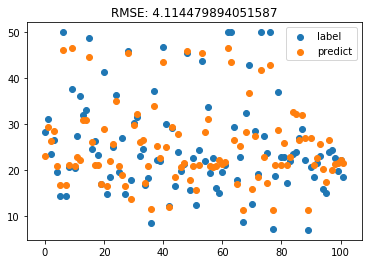

In [22]:
plt.scatter(range(len(y_test)), y_test, label='label')
plt.scatter(range(len(y_pred_abr)), y_pred_abr, label='predict')
plt.legend()
abr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_abr))
plt.title('RMSE: %s'%(abr_rmse))

Text(0.5,1,'Adaboost - no minmaxscale')

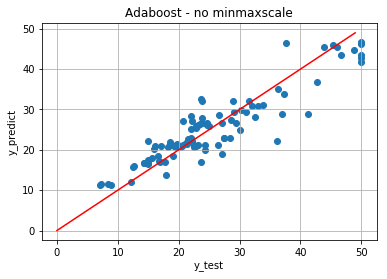

In [23]:
plt.scatter(y_test, y_pred_abr)
plt.plot(range(50),range(50), c='r')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.grid()
plt.title('Adaboost - no minmaxscale')

# 3. Random Forest

In [48]:
rf_model = RandomForestRegressor(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

Text(0.5,1,'RMSE: 3.9097288469742684')

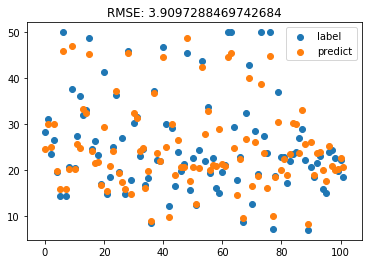

In [44]:
plt.scatter(range(len(y_test)), y_test, label='label')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='predict')
plt.legend()
abr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
plt.title('RMSE: %s'%(rf_rmse))

Text(0.5,1,'RandomForest - no minmaxscale')

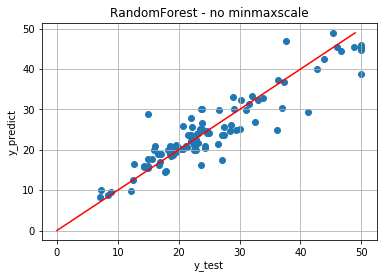

In [45]:
plt.scatter(y_test, y_pred_rf)
plt.plot(range(50),range(50), c='r')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.grid()
plt.title('RandomForest - no minmaxscale')

In [66]:
def plot(y_test, y_predict, rmse):
    fig = plt.figure(figsize=(16,6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(range(len(y_test)), y_test, label='label')
    ax1.scatter(range(len(y_predict)), y_predict, label='predict')
    ax1.legend()
    ax1.set_xlabel('n_sample')
    ax1.set_ylabel('price')
    ax1.set_title('RMSE: %s'%(rmse))
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(y_test, y_pred)
    ax2.plot(range(50),range(50), c='r')
    ax2.set_xlabel('y_test')
    ax2.set_ylabel('y_predict')
    ax2.grid()
    ax2.set_title('no minmaxscale')
    plt.show()

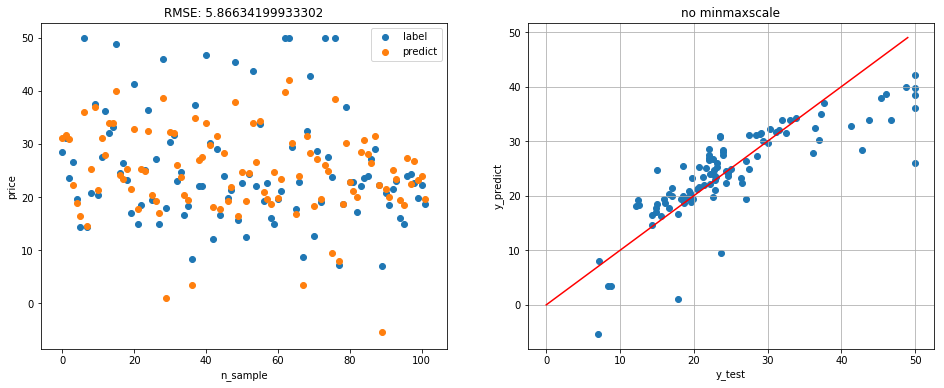

In [67]:
plot(y_test,y_pred,lr_rmse)

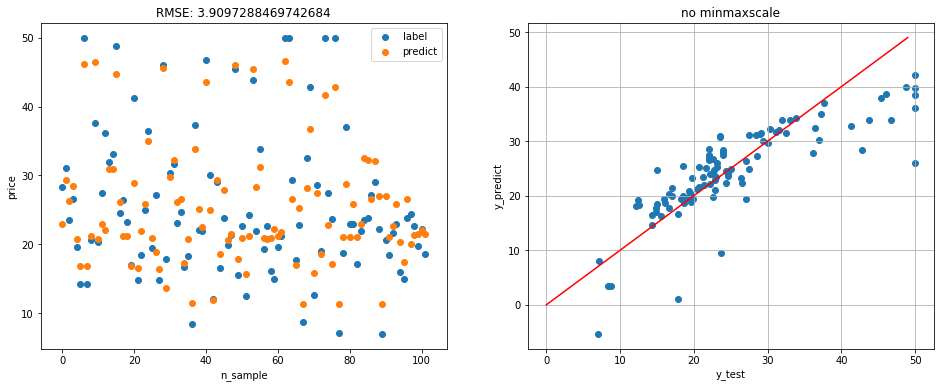

In [68]:
plot(y_test,y_pred_abr,abr_rmse)

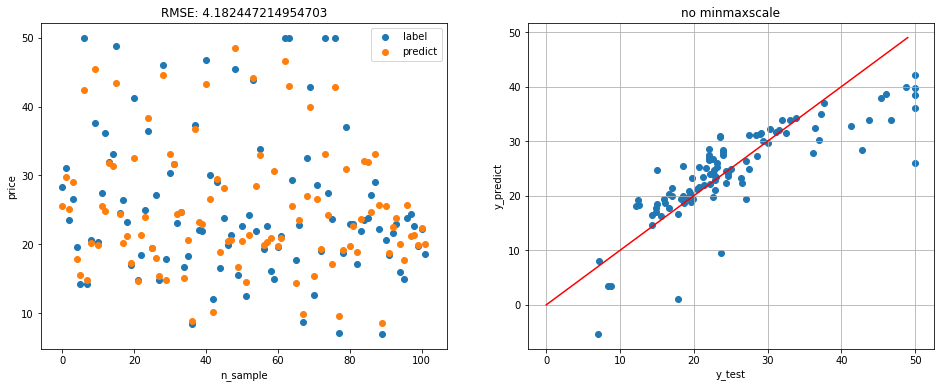

In [69]:
plot(y_test,y_pred_rf,rf_rmse)